In [17]:
from scipy.spatial import KDTree, ConvexHull
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

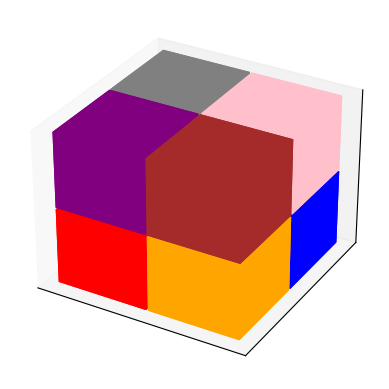

In [21]:
# create a densely spaced grid in the plot region
x = np.linspace(2,4,100)
y = np.linspace(2,4,100)
z = np.linspace(2,4,100)
X,Y,Z = np.meshgrid(x,y,z)
rng = np.random.default_rng(11)
# create a set of points in 3D
points = [[2,2,2],[4,2,2],[2,4,2],[4,4,2],[2,2,4],[2,4,4],[4,4,4],[4,2,4]]
colors = ["red", "orange", "green", "blue", "purple", "gray", "pink", "brown", "green"]
gridpoints = np.column_stack((X.flatten(),Y.flatten(),Z.flatten()))
# do the nearest neighbor interpolation
kdt = KDTree(points)
nndist,nnidx = kdt.query(gridpoints)
# nnidx gives the index of the Voronoi nucelus for each point in the grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# now cycle through all Voronoi indices
for voronoi_idx in np.unique(nnidx):
    idx_polygon = nnidx==voronoi_idx
    # create a convex hull around the point cloud
    hull = ConvexHull(gridpoints[idx_polygon])    
    polygon = Poly3DCollection(hull.points[hull.simplices], alpha=1, 
                               facecolors=colors[voronoi_idx],
                               linewidths=0.5)
    ax.add_collection3d(polygon)

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# plt.savefig("cube_3d")

plt.show()